# Data Visualization:
        EEG data can be plotted as a time series for each electrode or channel. This visualization helps you observe the raw EEG signals' patterns.
        Scalp topography plots show the amplitude and distribution of EEG activity across different electrode sites on the scalp. They help identify regional differences in brain activity.

# Frequency Analysis:
        Power Spectral Density (PSD): PSD analysis involves breaking down the EEG signal into its constituent frequency components using methods like Fast Fourier Transform (FFT). It quantifies the power (amplitude) of different frequency bands.
        Dominant Frequency Bands: By examining the PSD, you can identify dominant frequency bands within your EEG data, such as delta (0.5-4 Hz), theta (4-8 Hz), alpha (8-13 Hz), beta (13-30 Hz), and gamma (30+ Hz).
        Power Spectra: Plotting power spectra allows you to visualize how the power in each frequency band changes over time or between conditions.

# Event-Related Potentials (ERPs):
        ERP analysis involves aligning EEG data to specific events (e.g., a stimulus onset) and averaging the EEG signal across multiple trials or instances of that event. This creates an ERP waveform.
        ERPs reveal the brain's electrical response to specific stimuli or tasks. They can indicate cognitive processes like sensory perception, attention, and memory.

# Time-Frequency Analysis:
        Time-frequency analysis methods, such as wavelet analysis or short-time Fourier transform, capture both temporal and spectral information simultaneously.
        They help you identify changes in frequency components over time, which can be particularly useful for tasks with dynamic cognitive processes.

# Artifact Removal:
        EEG data can be contaminated by artifacts like eye blinks, muscle activity, or electrical noise. Artifact removal techniques, such as Independent Component Analysis (ICA), can help separate true brain activity from artifacts.
        Regression-based methods may be used to correct for artifacts or remove specific artifact sources.

# Statistical Analysis:
        Statistical tests (e.g., t-tests, ANOVA) are used to compare EEG data between different experimental conditions or groups.
        These tests can identify statistically significant differences in EEG features, such as amplitude or power, related to specific cognitive tasks or stimuli.

# Connectivity Analysis:
        Functional Connectivity: Functional connectivity analysis examines how different EEG channels or regions of the brain synchronize their activity. Measures like coherence or phase synchronization quantify these relationships.
        Effective Connectivity: Effective connectivity analysis investigates causal relationships between brain regions, often using methods like Granger causality.

# Machine Learning Classification:
        Machine learning models can be trained to classify EEG data into different cognitive states or conditions. Features extracted from the EEG signal (e.g., spectral features) are used as input to these models.
        Cross-validation helps evaluate model performance and prevent overfitting.

# Source Localization:
        EEG electrodes record activity from multiple brain sources. Source localization techniques aim to estimate the locations of these sources in the brain.
        Dipole modeling and distributed source reconstruction methods are commonly used for source localization.

# Temporal and Spatial Patterns:
        Temporal Patterns: EEG data can reveal temporal patterns like Event-Related Desynchronization (ERD), which indicates a decrease in power in a specific frequency band during a task, or Event-Related Synchronization (ERS), which indicates an increase in power.
        Spatial Patterns: Topographic maps show how EEG activity is distributed across the scalp, helping identify which brain regions are involved in specific cognitive processes.

These analyses provide a comprehensive view of EEG data and help researchers uncover insights into brain activity and cognitive processes during different tasks or conditions. The choice of analysis depends on the research question and the nature of the data. Proper preprocessing, artifact correction, and statistical rigor are crucial in EEG data analysis.

# Data Visualization: 
The preprocessed data can be used for basic data visualization.

# Frequency Analysis: 
You will need to implement specific methods for frequency analysis (e.g., FFT, multitaper) and adjust the code accordingly.

# Event-Related Potentials (ERPs): 
You can create epochs from the preprocessed data, but ERP analysis often involves additional steps such as baseline correction and averaging.

# Time-Frequency Analysis: 
You can perform time-frequency analysis using techniques like Morlet wavelets, but you may need to customize the code for more advanced analyses.

# Artifact Removal: 
The code includes basic preprocessing, but additional artifact detection and removal methods may be required.

# Statistical Analysis: 
The code includes basic statistical testing, but specific tests and analyses will depend on your research questions.

# Connectivity Analysis: 
Connectivity analysis typically requires preprocessing steps specific to connectivity measures (e.g., coherence, cross-correlation).

# Machine Learning Classification: 
Machine learning requires feature extraction and model training, which are not included in the preprocessing code.

# Source Localization: 
Source localization involves complex modeling and may require specialized preprocessing steps.

# Temporal and Spatial Patterns: 
Analyzing temporal and spatial patterns depends on your specific research goals and analysis techniques.

In [1]:
from glob import glob
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
import scipy.io
from scipy import signal
from scipy.signal import firwin
from scipy.signal import welch
import scipy.signal
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split,KFold  # Add this import
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# List of MATLAB files to load
mat_files = ["P1_pre_training.mat",
    "P1_pre_test.mat",
    "P1_post_training.mat",
    "P1_post_test.mat",
    "P2_pre_training.mat",
    "P2_pre_test.mat",
    "P2_post_training.mat",
    "P2_post_test.mat",
    "P3_pre_training.mat",
    "P3_pre_test.mat",
    "P3_post_training.mat",
    "P3_post_test.mat",
]

In [3]:
# Load and print the variable description from each MATLAB file
for file in mat_files:
    mat_data = scipy.io.loadmat(file)
    print(f"Variable description for {file}:\n")
    for key, value in mat_data.items():
        if not key.startswith("__"):
            print(f"{key}: {value}")
    print("\n" + "=" * 40 + "\n")

Variable description for P1_pre_training.mat:

fs: [[256]]
trig: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
y: [[ 3.80018398e+04  3.68920000e+04  4.63972148e+04 ...  4.73842734e+04
   3.89799922e+04  6.18201797e+04]
 [ 5.48285508e+04  5.48681562e+04  5.24441562e+04 ...  5.29788633e+04
   5.44744570e+04  5.02554727e+04]
 [-2.46292539e+04 -2.48654004e+04 -2.29641406e+04 ... -2.33392227e+04
  -2.45639395e+04 -2.12898848e+04]
 ...
 [ 2.11301407e+02  4.84203949e+01 -4.04784279e+01 ... -1.55355492e+01
  -2.32711544e+01 -1.17726011e+01]
 [ 2.32342209e+02  6.48452072e+01 -2.43780880e+01 ...  7.91025400e+00
  -1.74947681e+01 -1.12446318e+01]
 [ 2.17404312e+02  5.34608688e+01 -3.19530563e+01 ... -7.74129963e+00
  -2.44102573e+01 -9.39879894e+00]]


Variable description for P1_pre_test.mat:

fs: [[256]]
trig: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
y: [[ 0.00000000e+00  8.97300110e+01  9.68824539e+01 ...  3.91688080e+02
   2.88958069e+02  2.86595734e+02]
 [-1.38052994e+02  1.44233551e+02 -2.06288184e+03 ...

Variable description for P3_post_test.mat:

fs: [[256]]
trig: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
y: [[    0.            89.73001099    96.88245392 ...   391.68807983
    288.95806885   286.59573364]
 [ -672.10998535   129.15327454  8064.17089844 ... 11243.76171875
    654.74621582 -1405.93530273]
 [  274.72531128   102.0644989  -1444.03271484 ... -1961.390625
    -39.20321274   423.75915527]
 ...
 [  -17.5668602    -46.84444427  -100.33616638 ...   -81.61685181
    -94.57012939    27.02565193]
 [  -16.02523041   -49.66806412  -106.04021454 ...   -82.20947266
    -97.9437027     24.48883057]
 [  -20.13770294   -61.07574081  -117.20072174 ...   -92.51826477
   -105.564888      14.31708431]]




# DATA VISUALIZATION

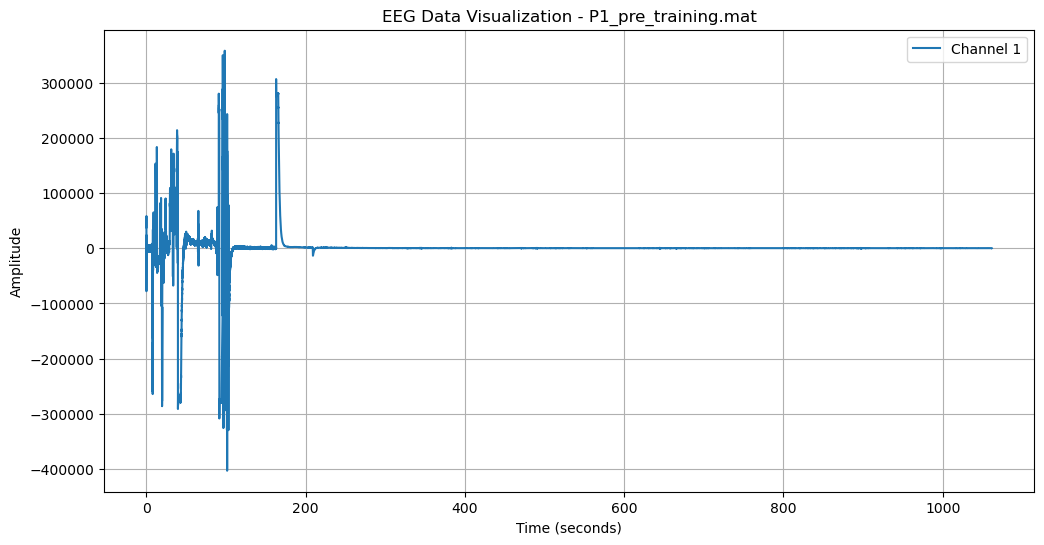

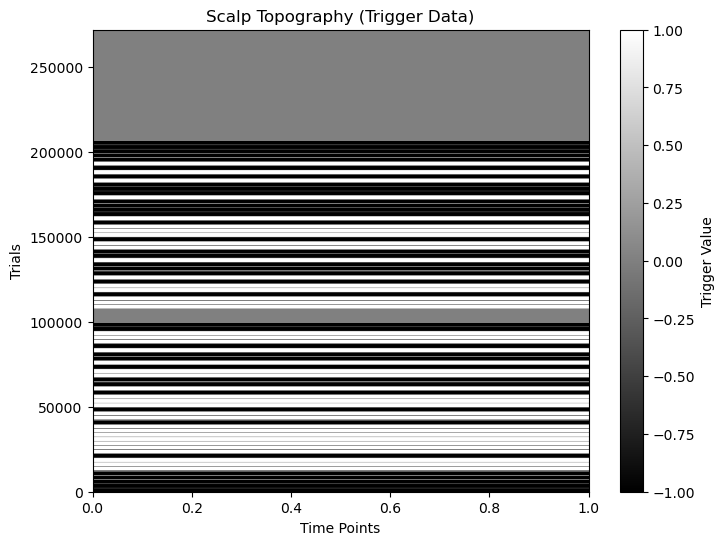

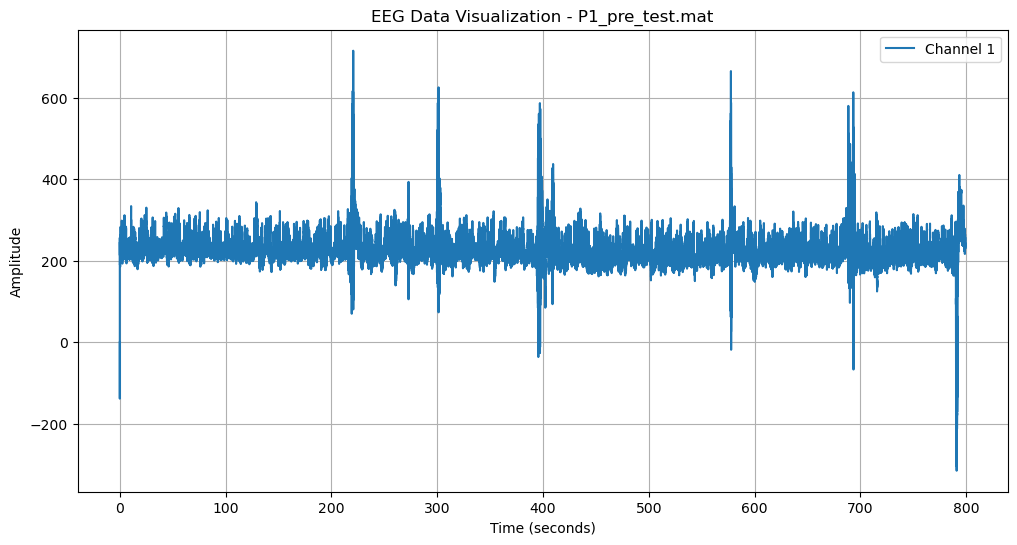

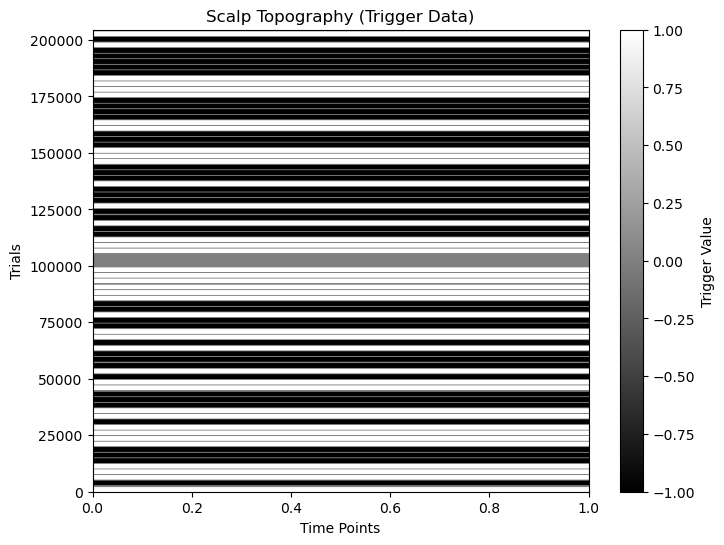

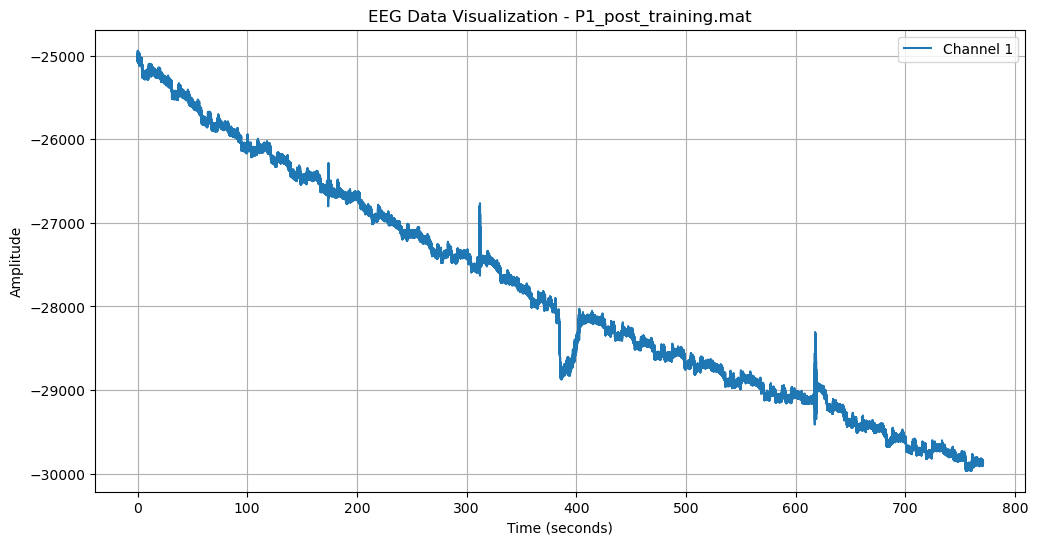

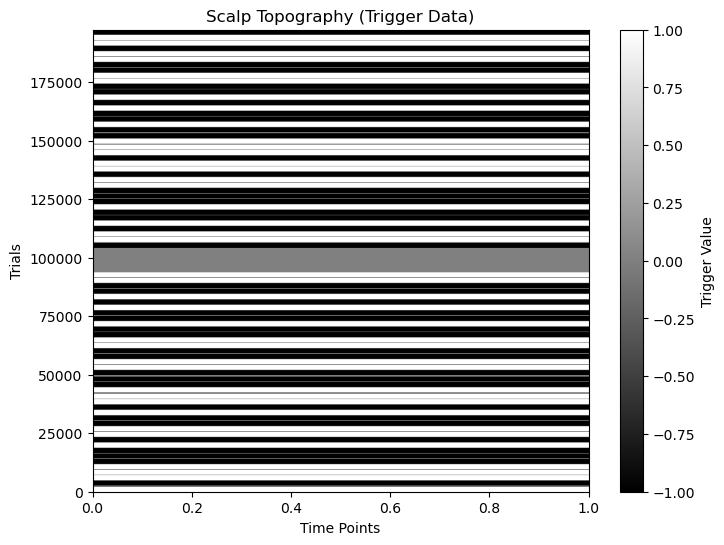

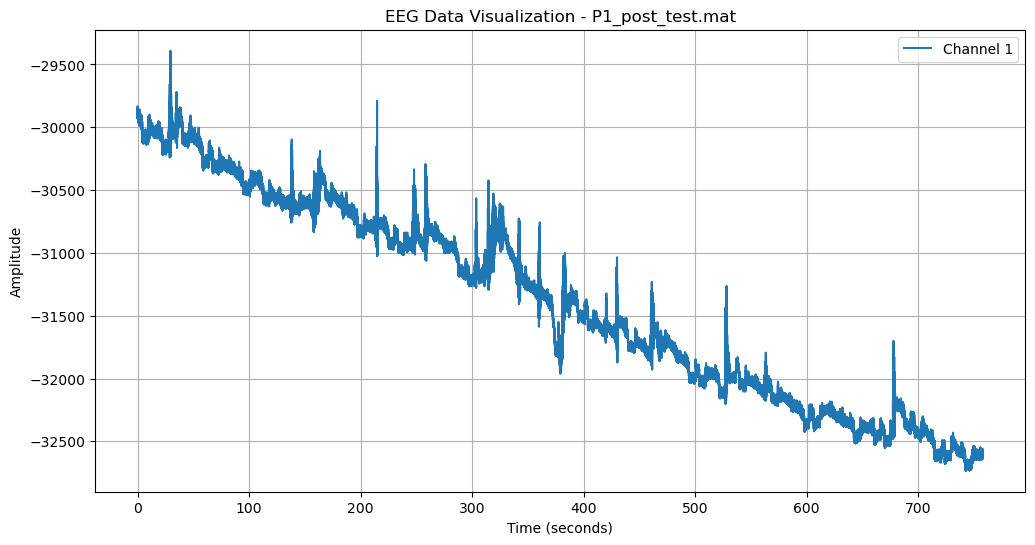

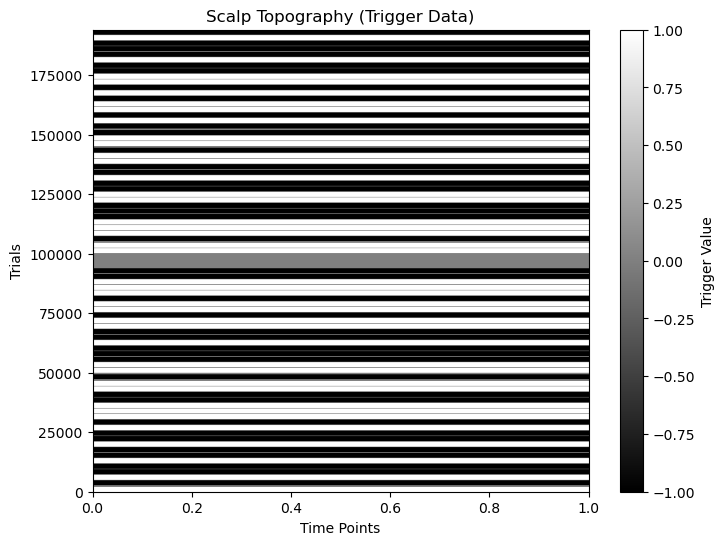

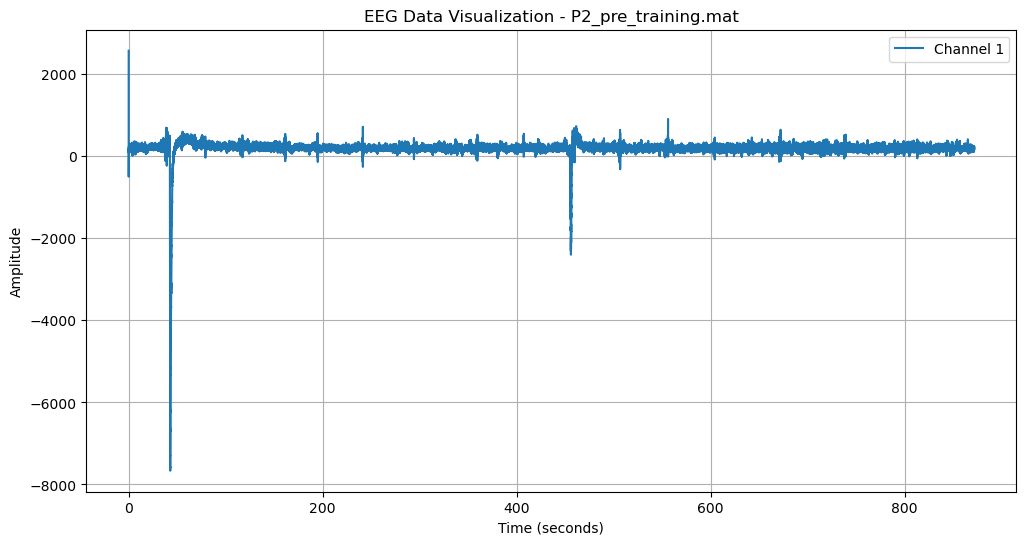

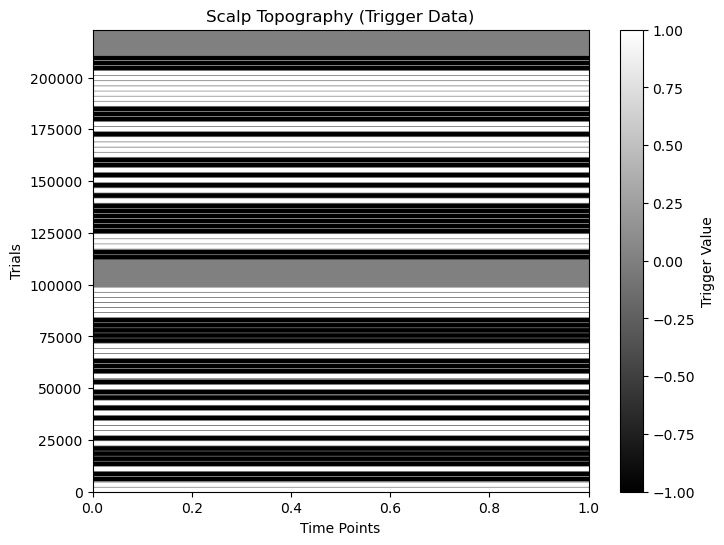

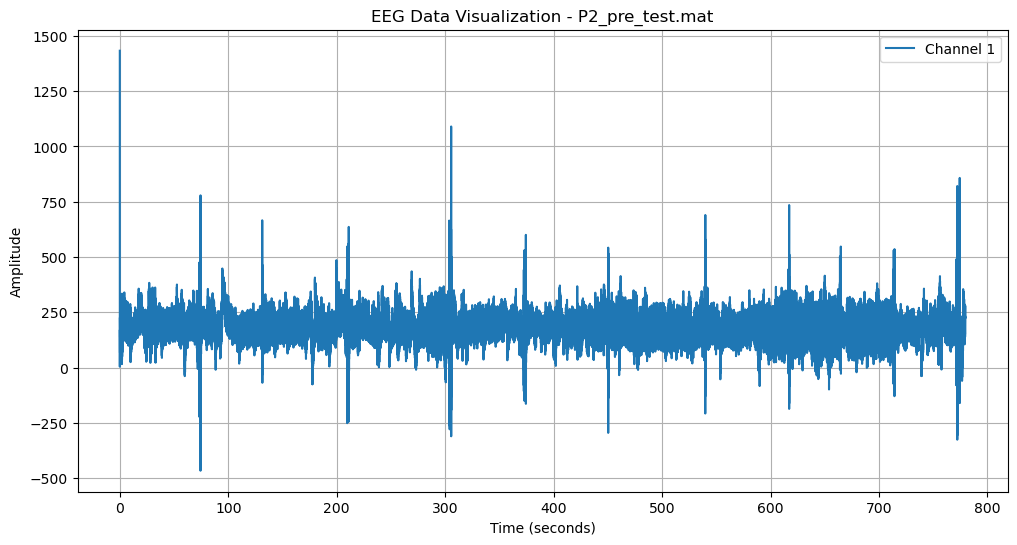

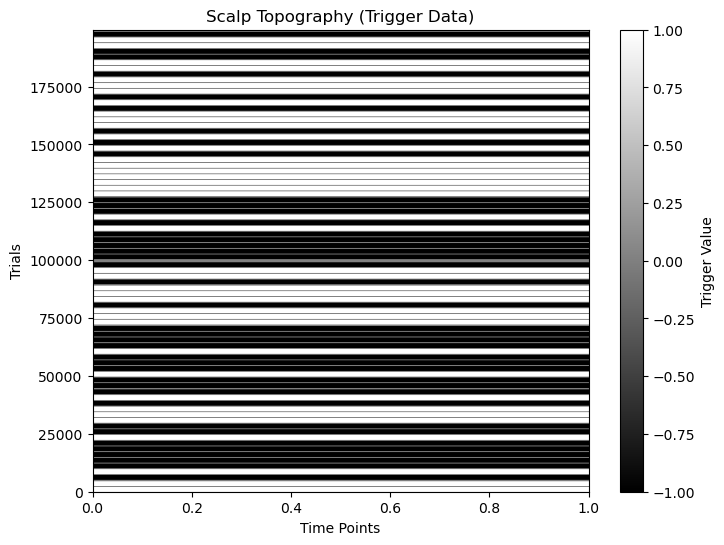

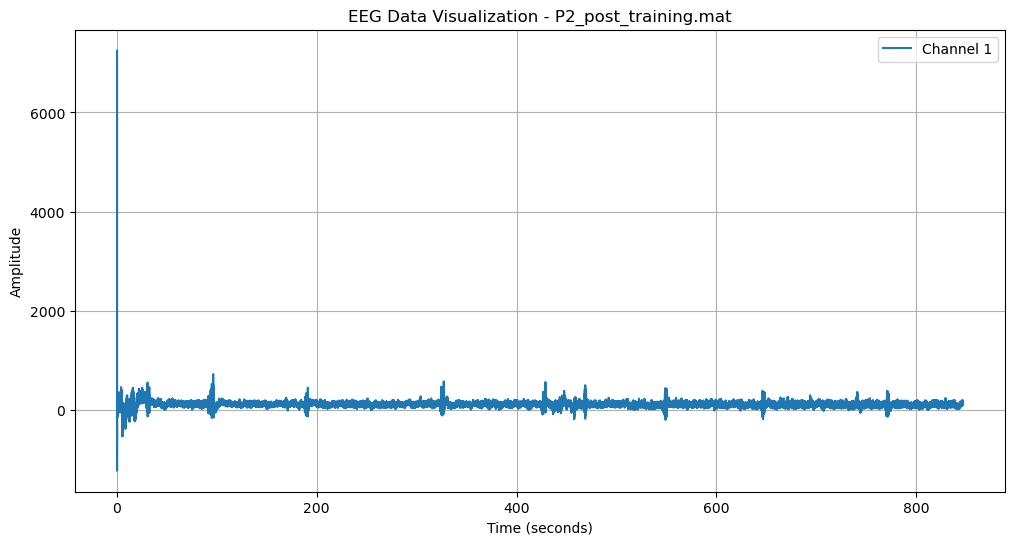

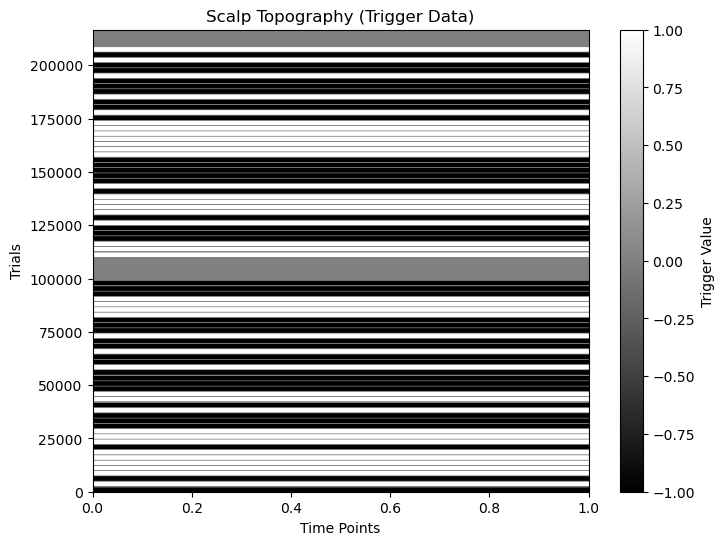

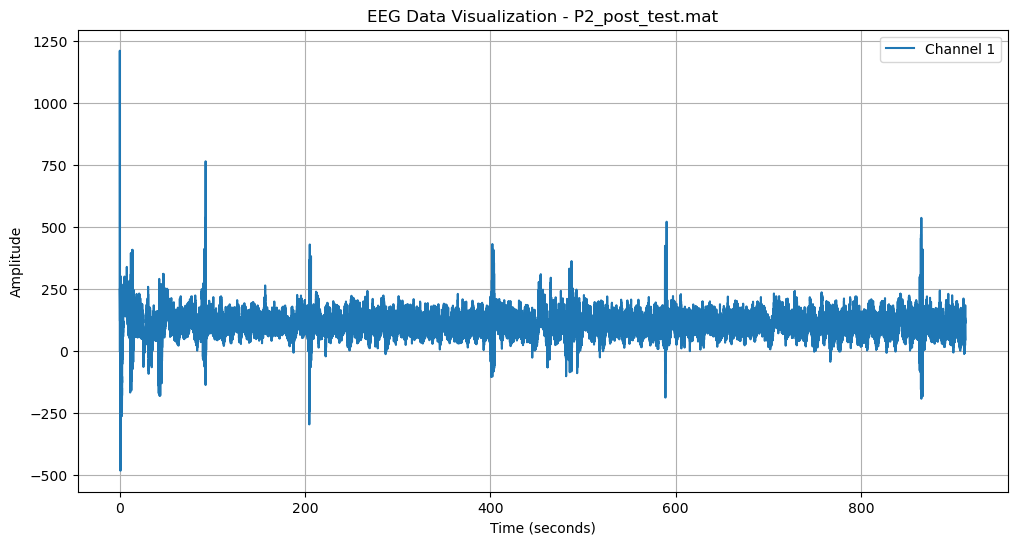

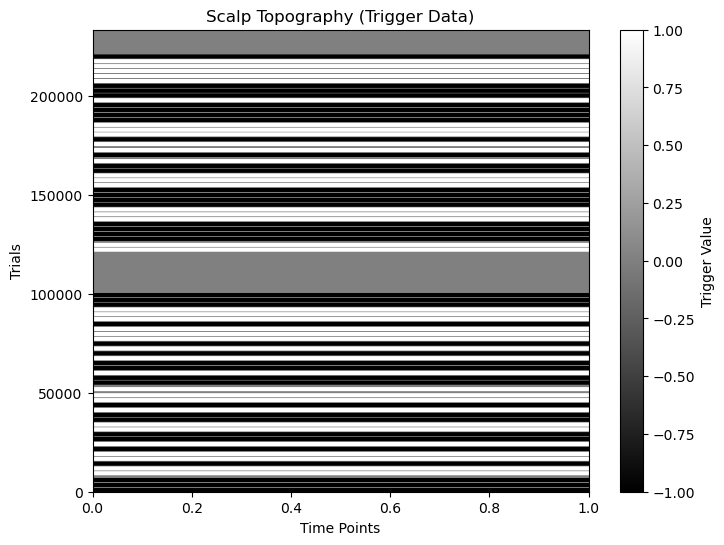

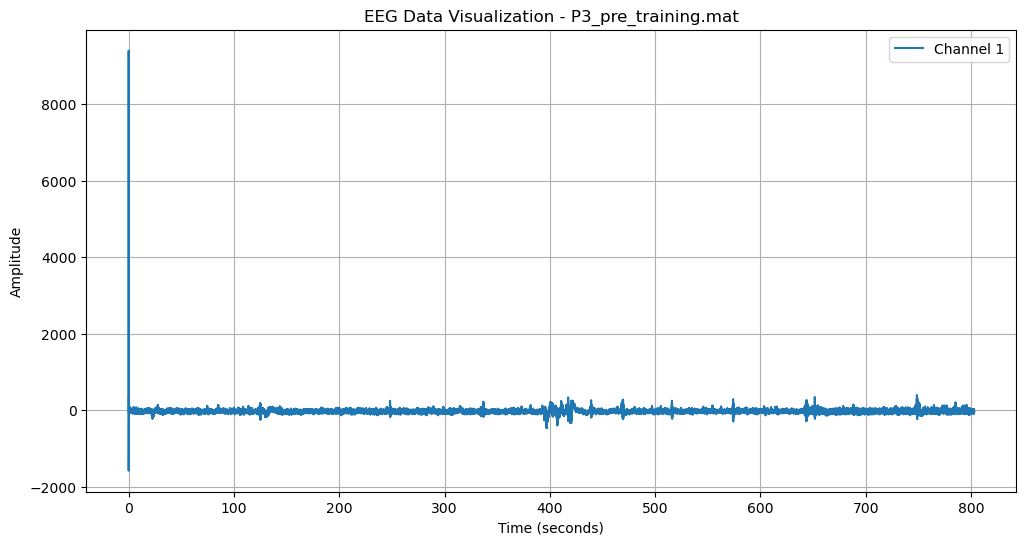

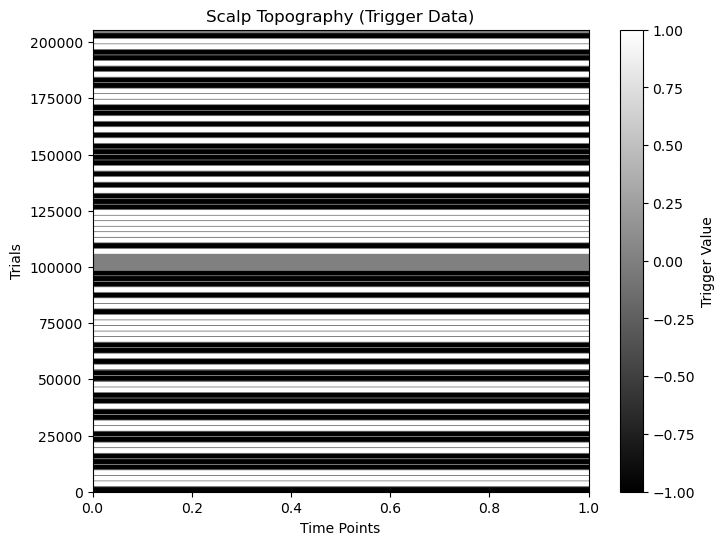

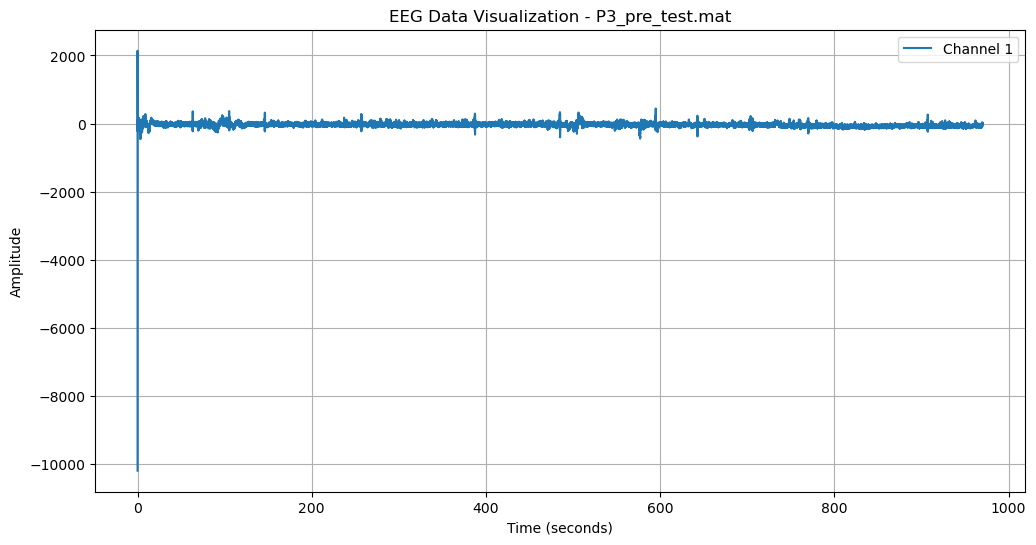

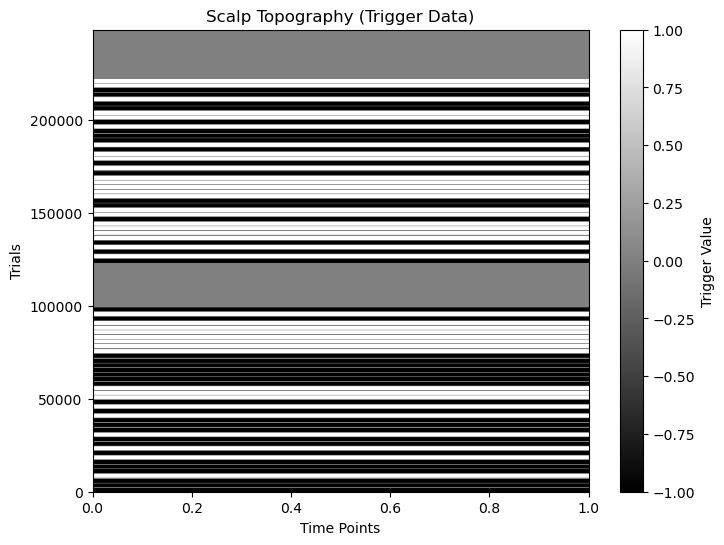

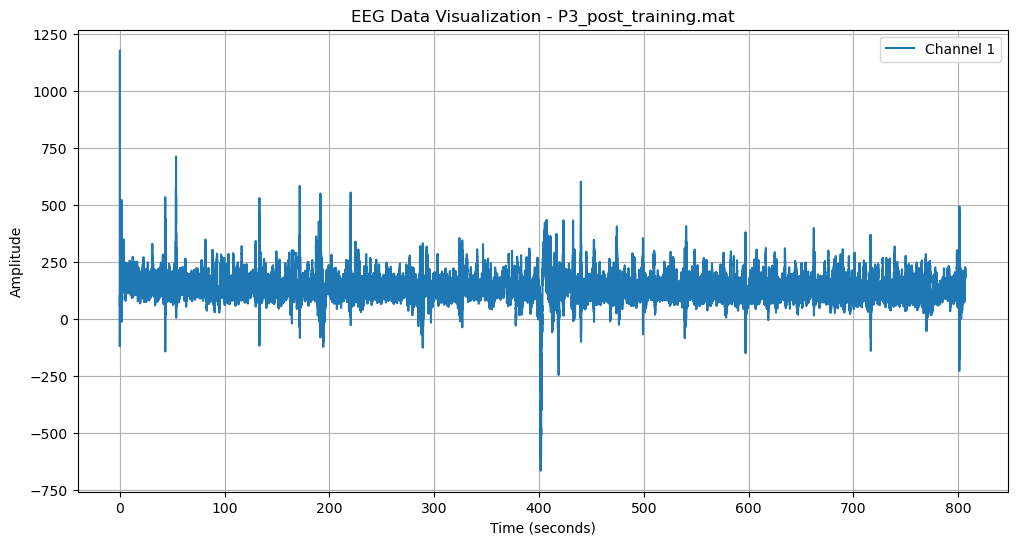

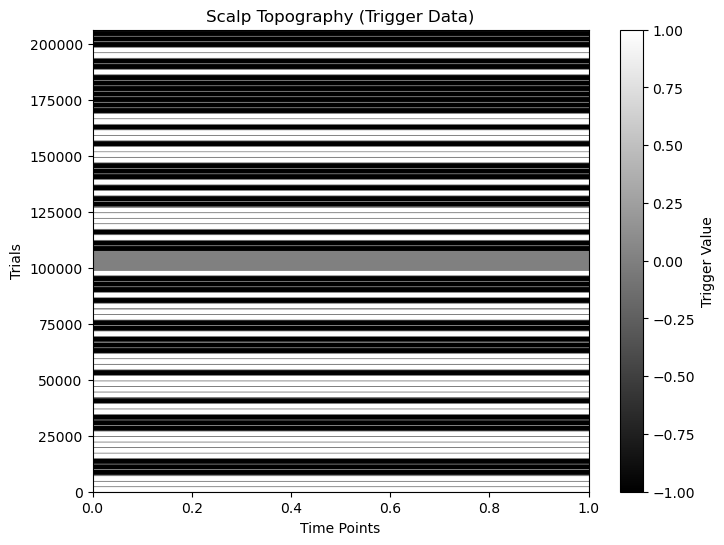

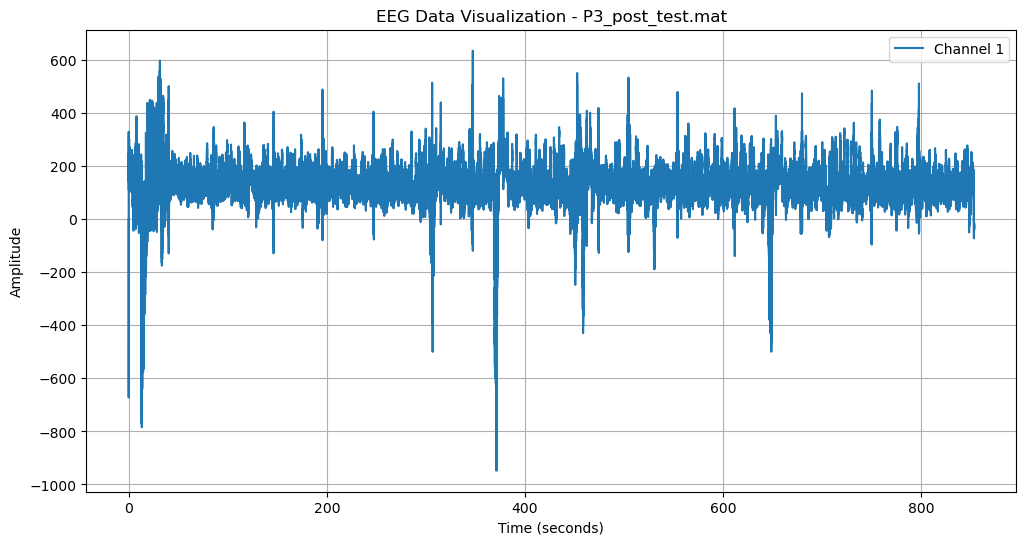

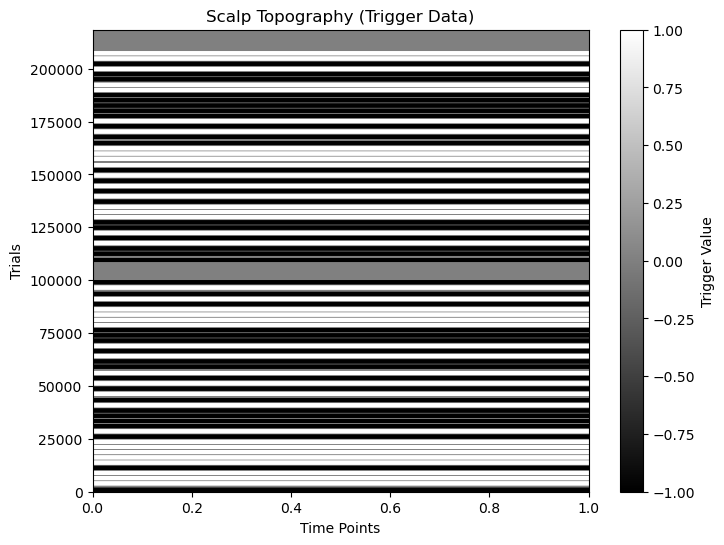

In [34]:
# Loop through the MATLAB files
for file in mat_files:
    mat_data = scipy.io.loadmat(file)
    
    # Extract EEG data, sampling rate, and trigger data
    y = mat_data.get('y')
    fs = mat_data.get('fs')[0, 0]
    trig = mat_data.get('trig')
    
    # Visualize EEG data for the first channel
    channel_to_visualize = 0  # You can change this to any desired channel
    time_points = np.arange(y.shape[0]) / fs
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_points, y[:, channel_to_visualize], label=f'Channel {channel_to_visualize + 1}')
    plt.title(f'EEG Data Visualization - {file}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Visualize scalp topography
    plt.figure(figsize=(8, 6))
    plt.imshow(trig, cmap='gray', aspect='auto', extent=[0, trig.shape[1], 0, trig.shape[0]])
    plt.title('Scalp Topography (Trigger Data)')
    plt.xlabel('Time Points')
    plt.ylabel('Trials')
    plt.colorbar(label='Trigger Value')
    plt.show()

# Frequency Analysis

In [10]:
# Define the frequency bands
frequency_bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 100),
}

ValueError: x and y must have same first dimension, but have shapes (3717,) and (16,)

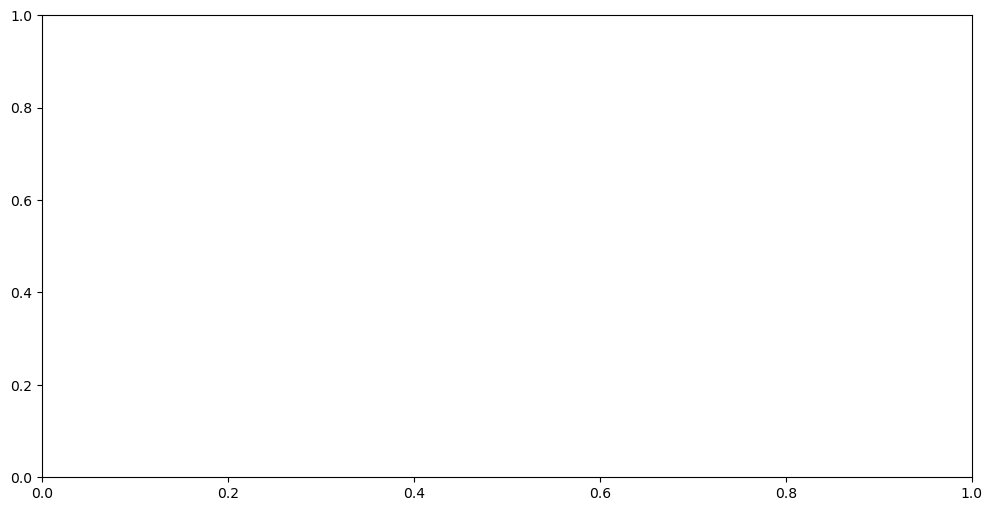

In [33]:
# Loop through the MATLAB files
for file in mat_files:
    mat_data = scipy.io.loadmat(file)
    
    # Extract EEG data, sampling rate, and trigger data
    y = mat_data.get('y')
    fs = mat_data.get('fs')[0, 0]
    
    # Compute power spectral density (PSD) using FFT
    n_samples = y.shape[0]
    freqs = np.fft.fftfreq(n_samples, 1/fs)
    fft_values = np.fft.fft(y, axis=0)
    psd = np.abs(fft_values) ** 2 / (n_samples * fs)
    
    # Plot PSD for each frequency band
    plt.figure(figsize=(12, 6))
    for band_name, (low, high) in frequency_bands.items():
        # Find indices corresponding to the frequency band
        band_indices = np.where((freqs >= low) & (freqs <= high))[0]
        
        # Calculate the mean PSD in the frequency band separately for each channel
        band_psd = np.mean(psd[band_indices, :], axis=0)
        
        # Create a frequency array for the x-axis
        freq_values = freqs[band_indices]
        
        # Plot the PSD
        plt.plot(freq_values, band_psd, label=band_name)
    
    plt.title(f'Power Spectral Density - {file}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Event-Related Potentials (ERPs)

In [25]:
# Define the time window for ERP analysis (in seconds)
erp_window_start = -0.2  # Start of ERP window relative to trigger
erp_window_end = 0.8     # End of ERP window relative to trigger

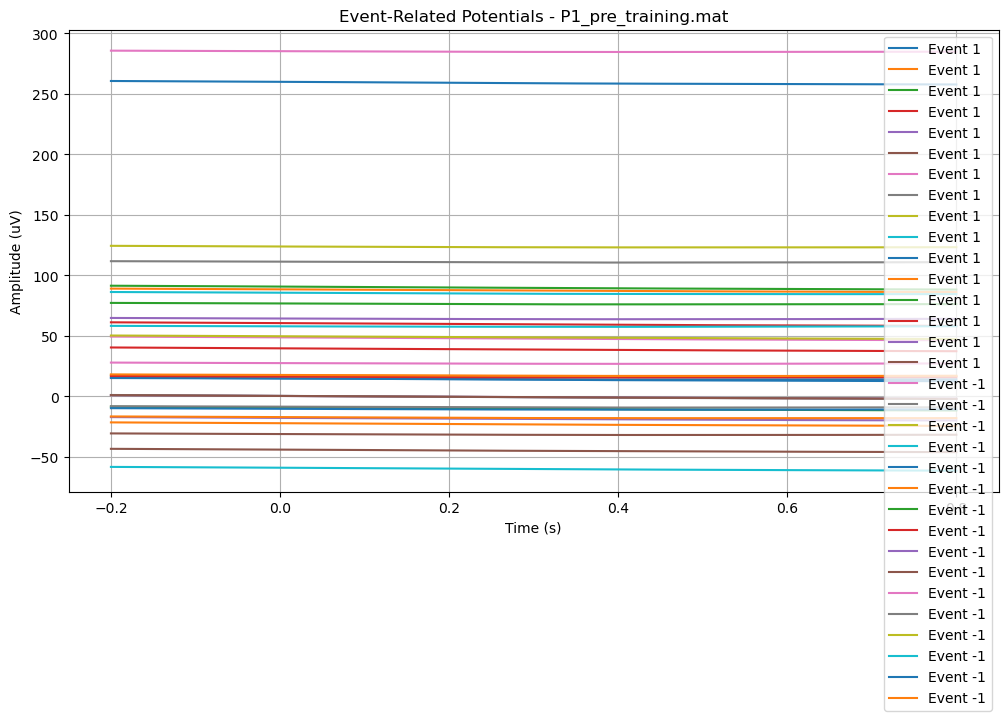

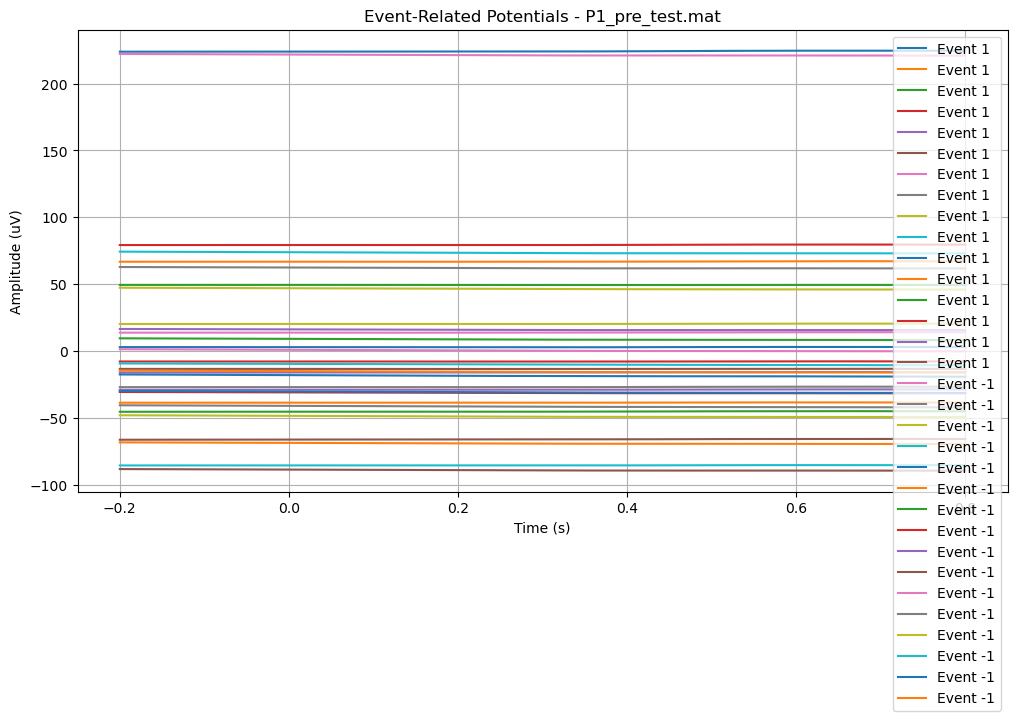

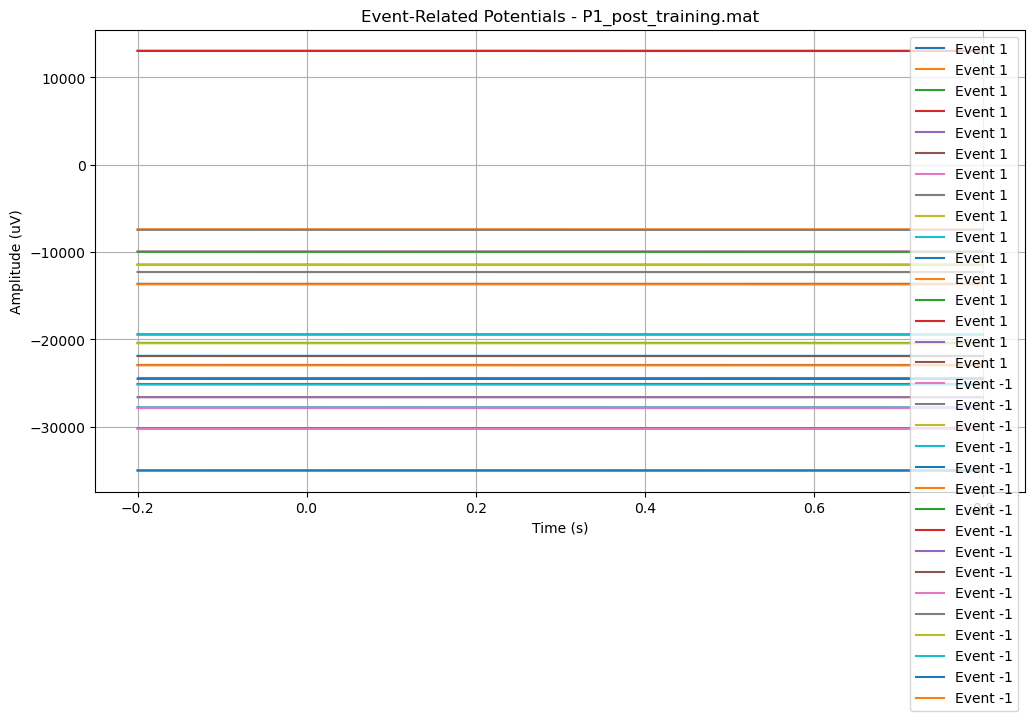

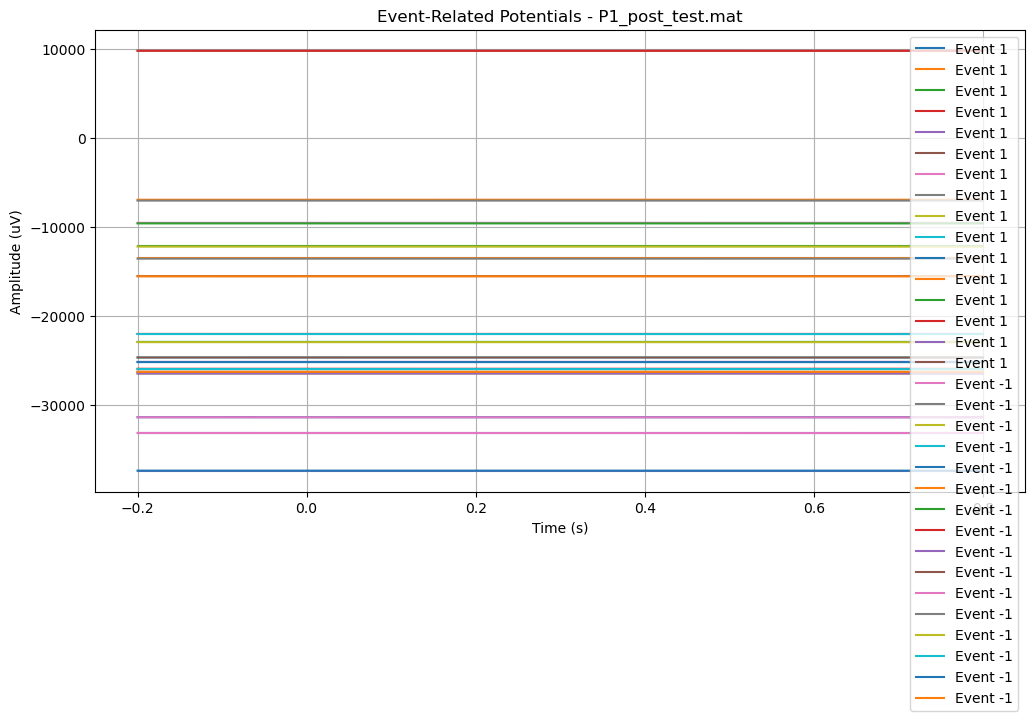

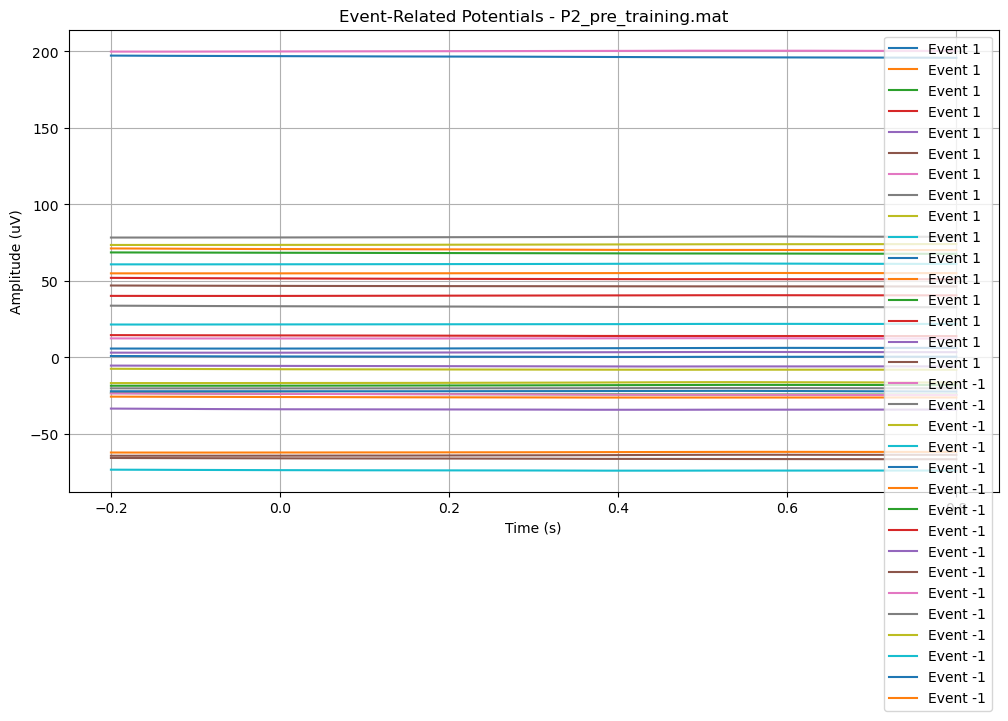

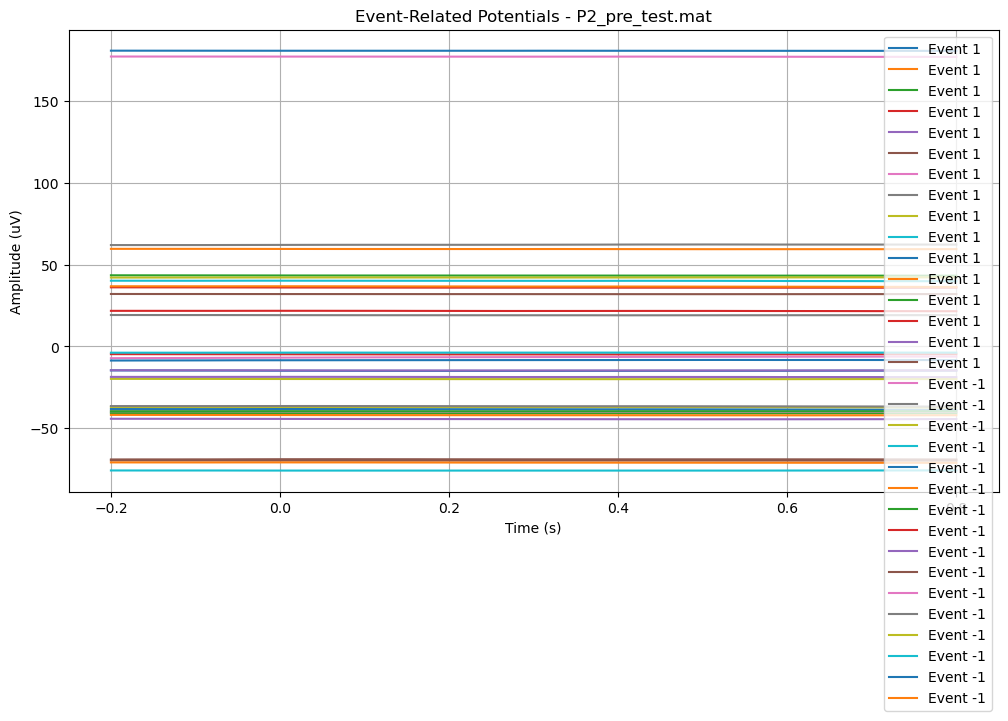

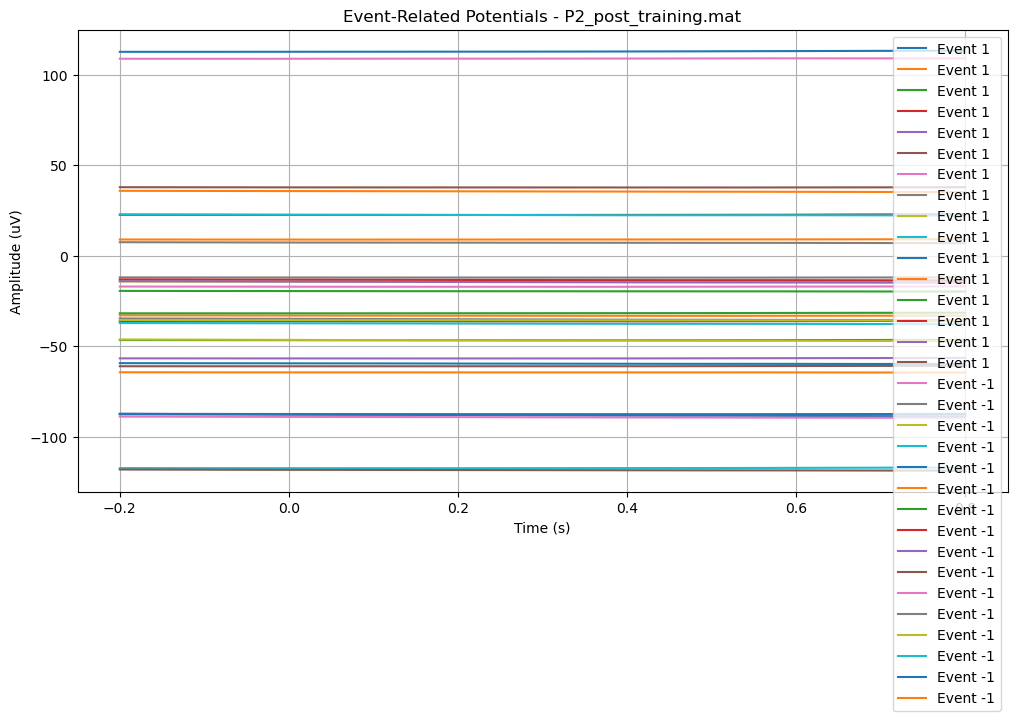

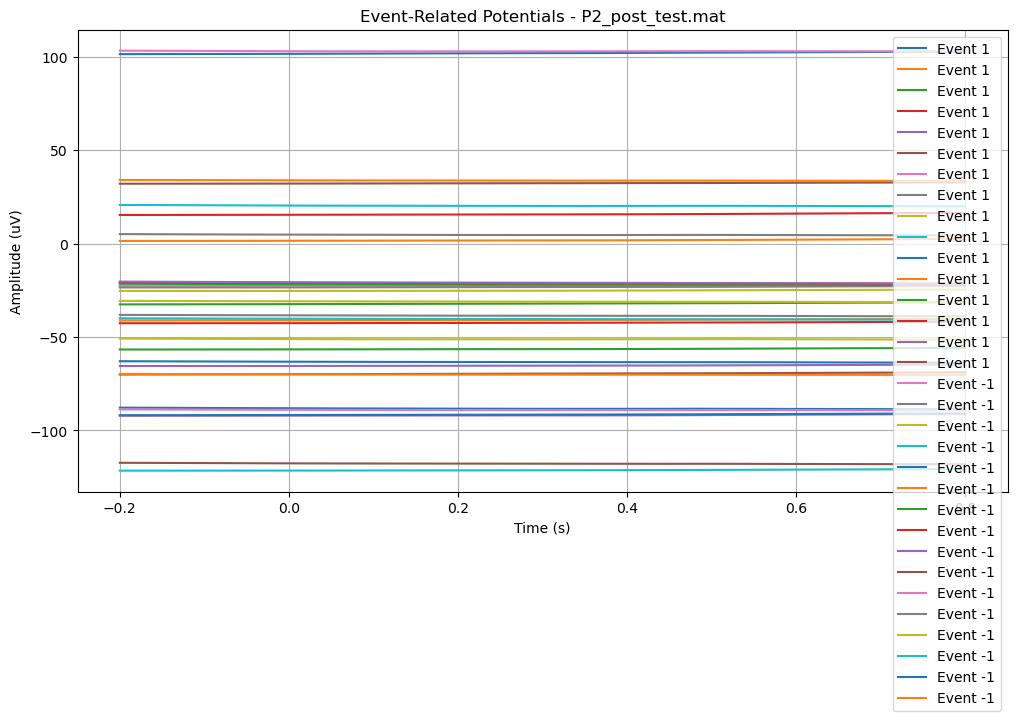

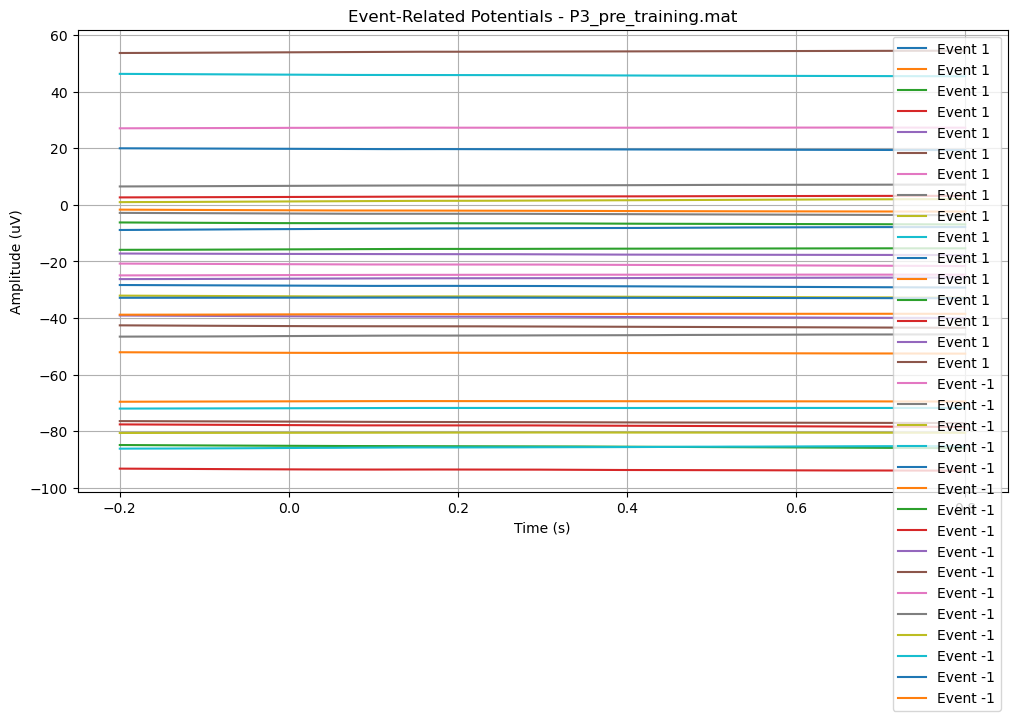

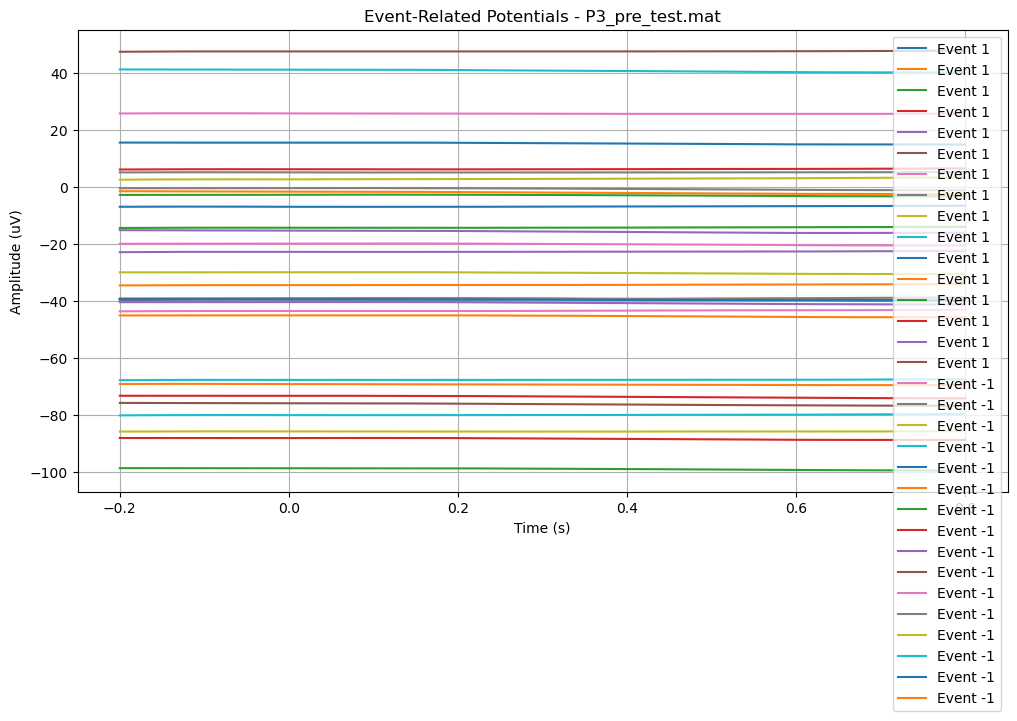

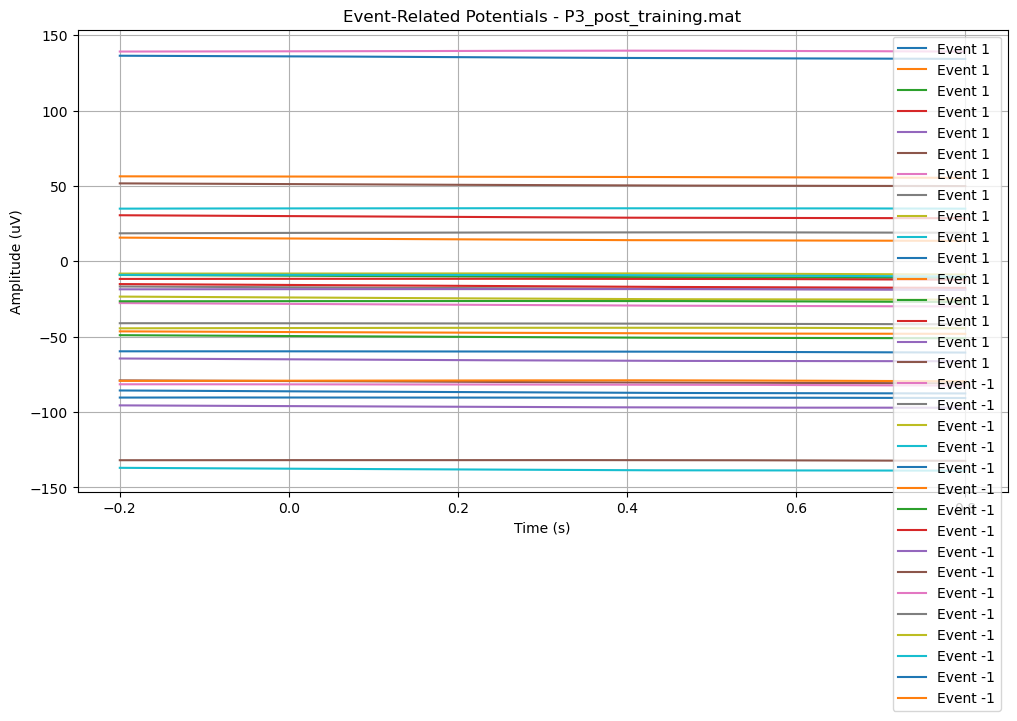

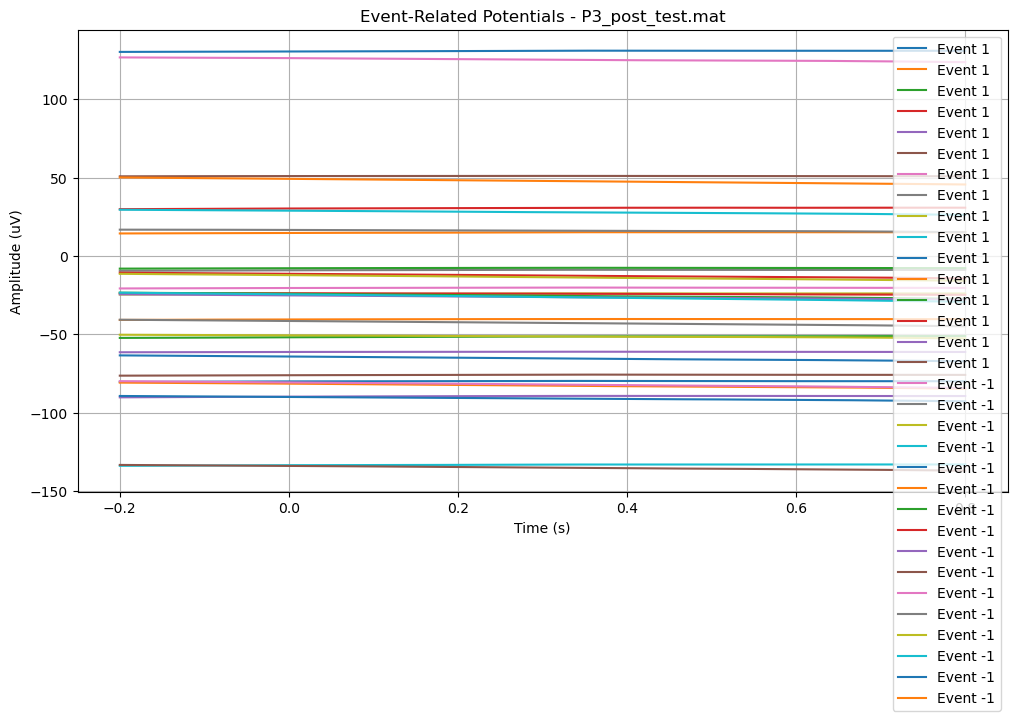

In [32]:
# Loop through the MATLAB files
for file in mat_files:
    mat_data = scipy.io.loadmat(file)
    
    # Extract EEG data, sampling rate, and trigger data
    y = mat_data.get('y')
    fs = mat_data.get('fs')[0, 0]
    trigger_data = mat_data.get('trig')
    
    # Define event markers (e.g., +1 for left hand movement, -1 for right hand movement)
    event_markers = [1, -1]  # Modify this based on your trigger values
    
    # Create an array to store ERPs for each event marker
    erps = {marker: [] for marker in event_markers}
    
    # Iterate through each event marker and compute ERPs
    for marker in event_markers:
        event_indices = np.where(trigger_data == marker)[0]
        
        # Extract ERP for each trial aligned to the event marker
        for event_index in event_indices:
            # Define the time window around the event
            start_sample = int((erp_window_start * fs) + event_index)
            end_sample = int((erp_window_end * fs) + event_index)
            
            # Ensure the ERP window is within the data boundaries
            if start_sample >= 0 and end_sample < y.shape[0]:
                erp_trial = y[start_sample:end_sample + 1, :]
                erps[marker].append(erp_trial)
    # Average ERPs across trials for each event marker
    plt.figure(figsize=(12, 6))
    for marker, erp_trials in erps.items():
        if len(erp_trials) > 0:
            average_erp = np.mean(erp_trials, axis=0)
            time_points = np.linspace(erp_window_start, erp_window_end, average_erp.shape[0])
            plt.plot(time_points, average_erp, label=f'Event {marker}')
    
    plt.title(f'Event-Related Potentials - {file}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (uV)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Time- Frequency Analysis

In [37]:
from scipy.signal import spectrogram

In [38]:
# Define the time-frequency analysis parameters
nperseg = 256  # Length of each segment for the STFT
noverlap = 128  # Overlap between segments
freqs, times, Sxx = None, None, None

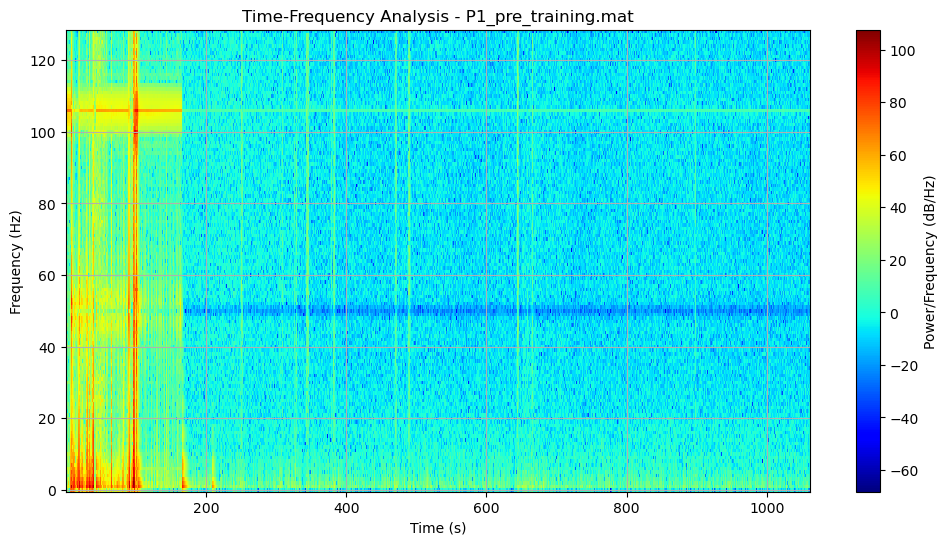

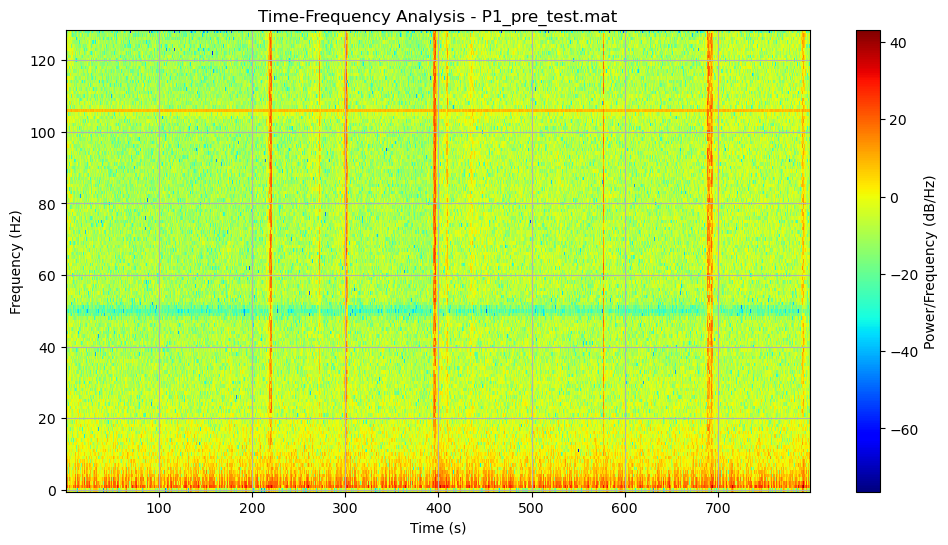

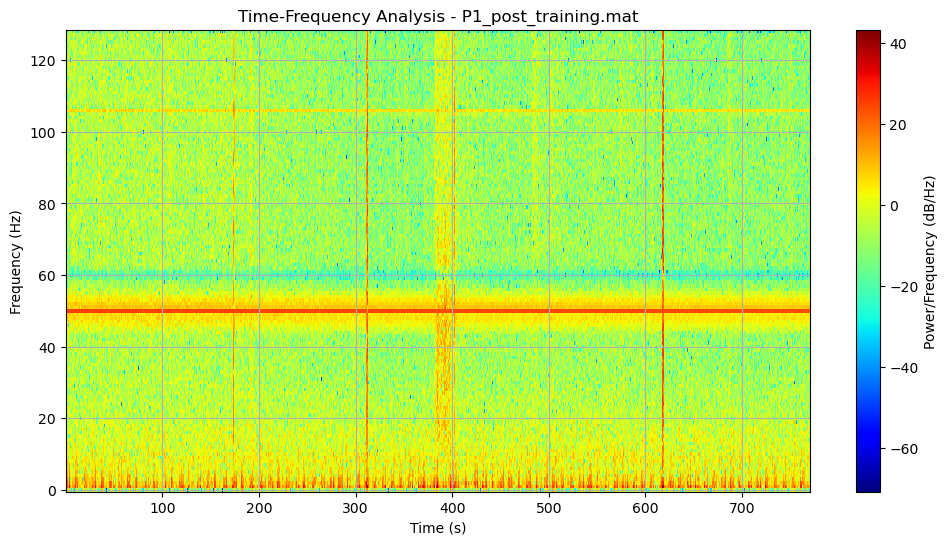

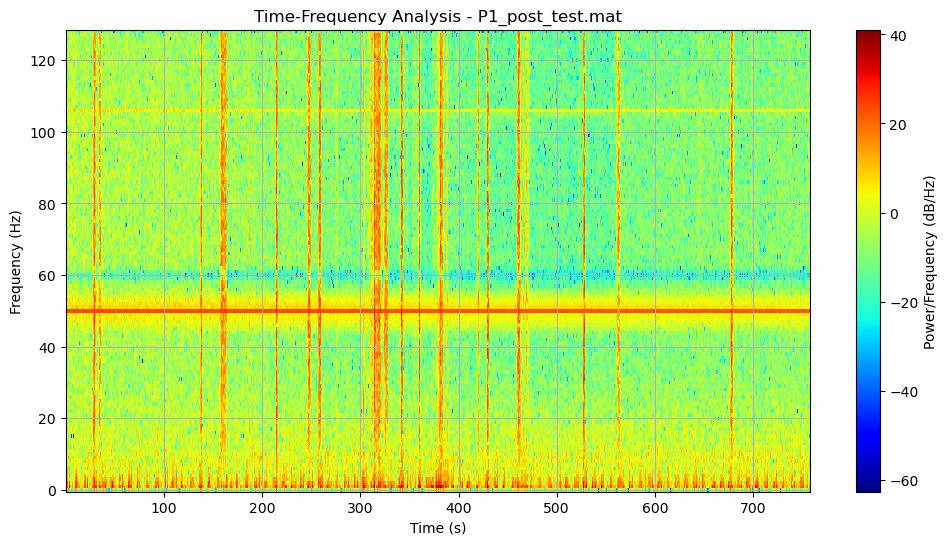

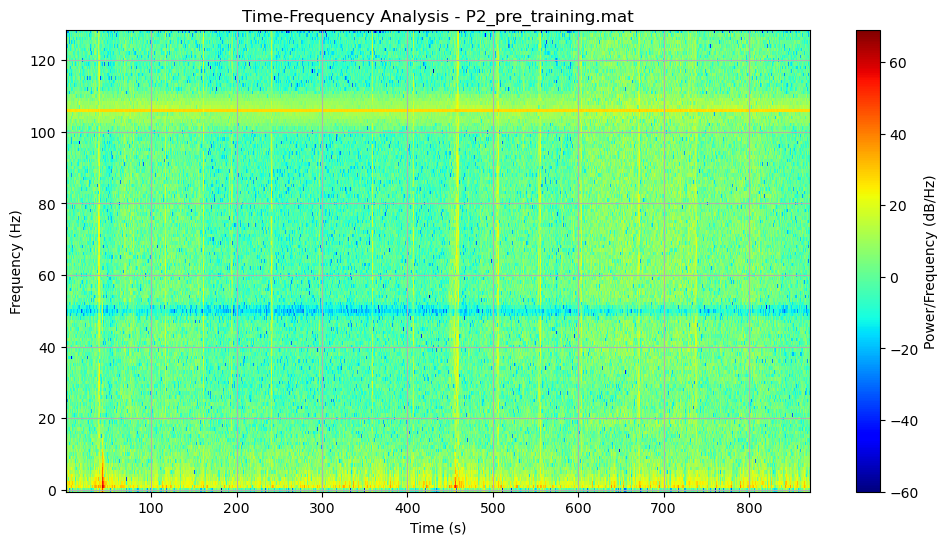

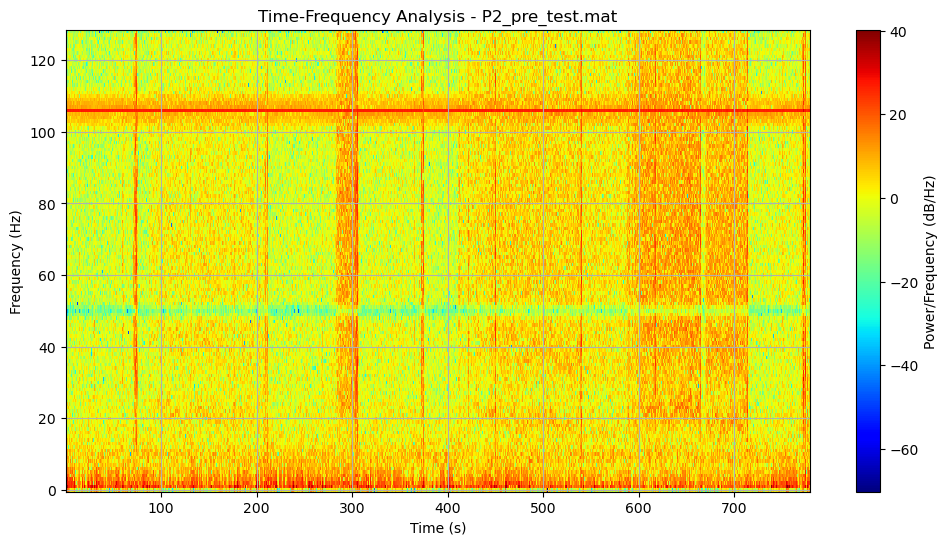

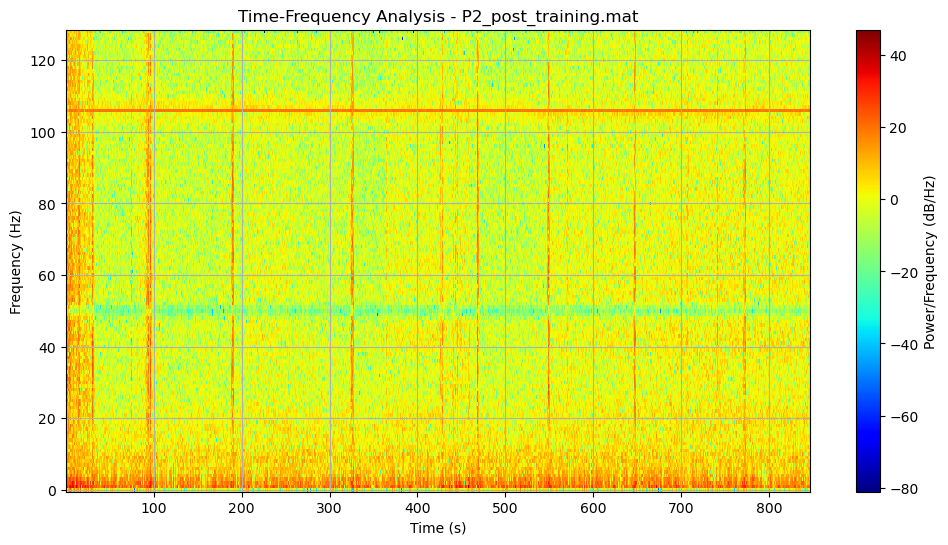

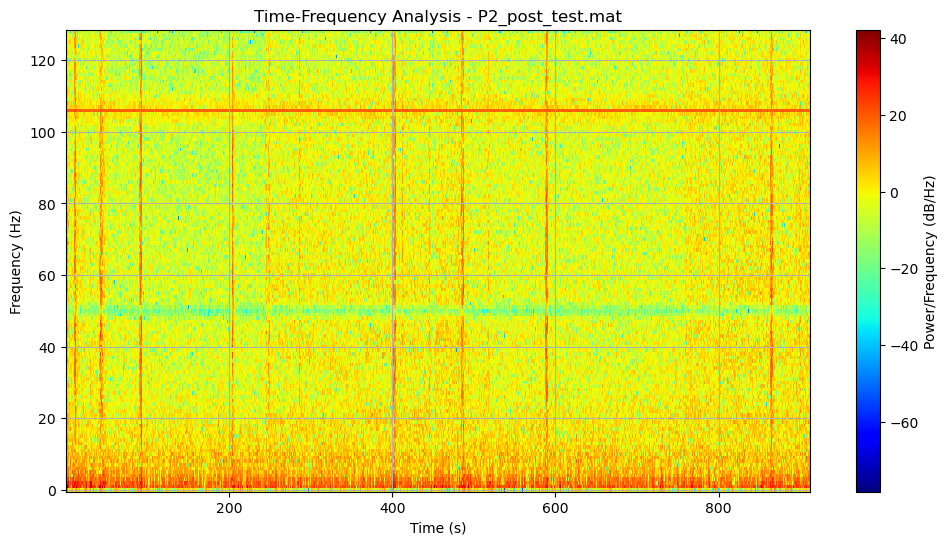

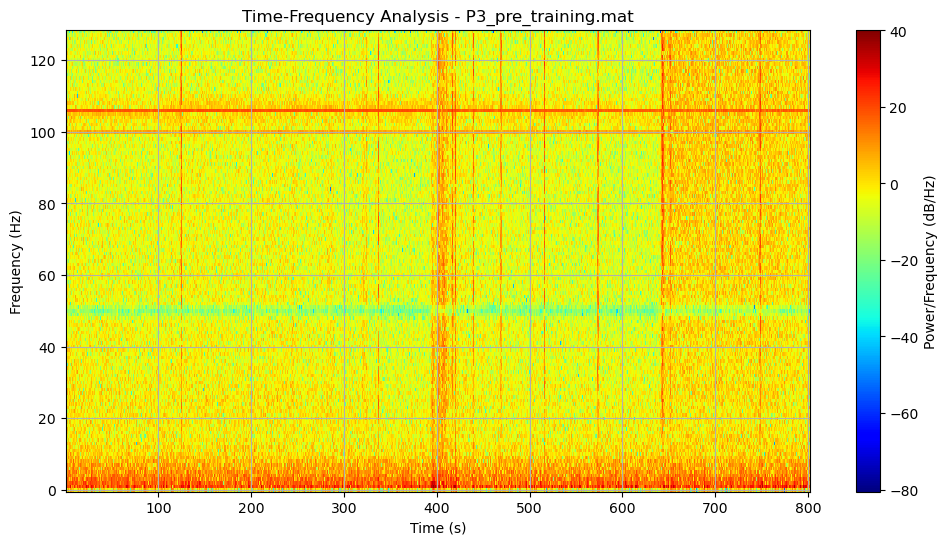

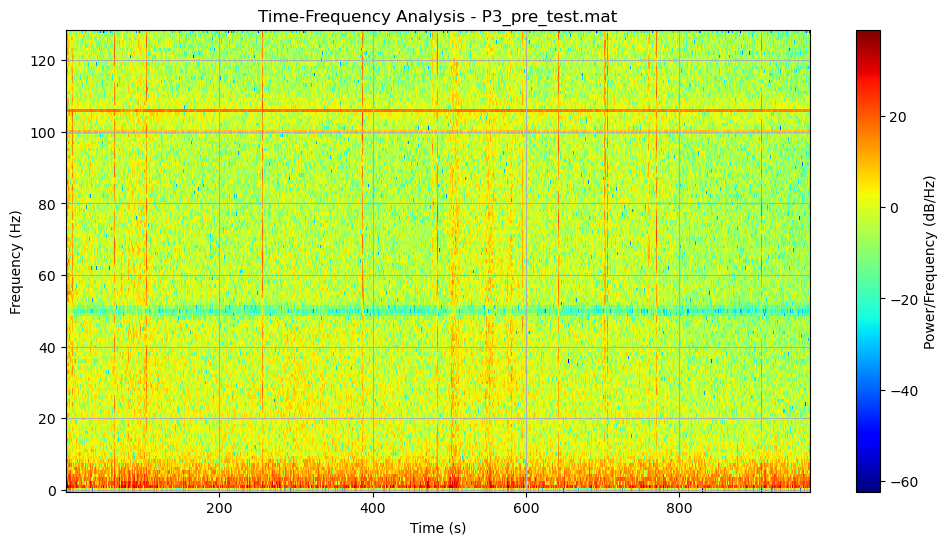

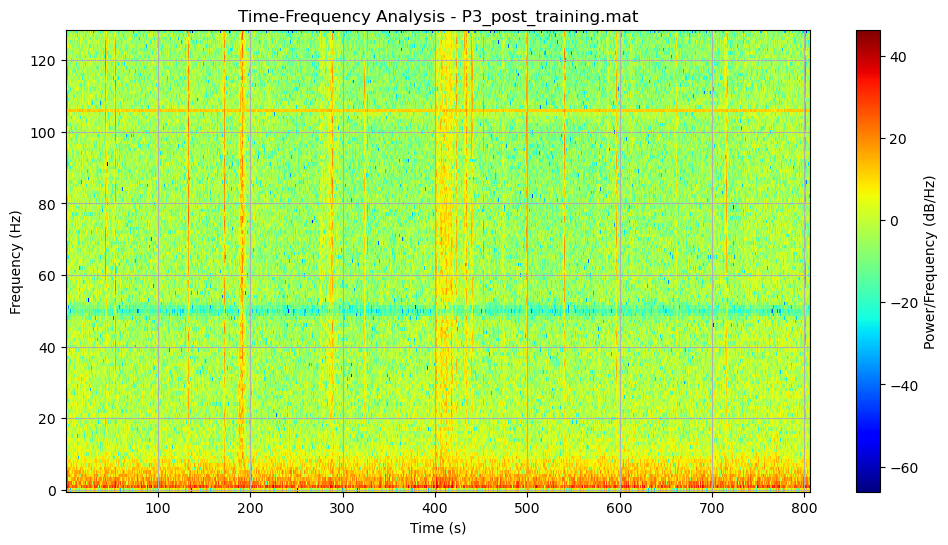

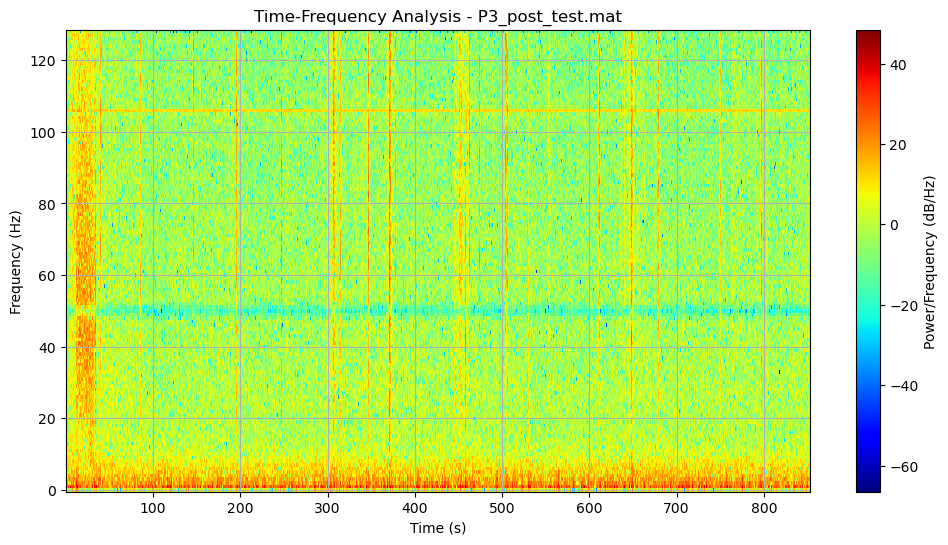

In [39]:
# Loop through the MATLAB files
for file in mat_files:
    mat_data = scipy.io.loadmat(file)
    
    # Extract EEG data, sampling rate, and trigger data
    y = mat_data.get('y')
    fs = mat_data.get('fs')[0, 0]
    
    # Perform Short-Time Fourier Transform (STFT) on a single channel (adjust channel_index)
    channel_index = 0  # Modify this index based on the channel you want to analyze
    freqs, times, Sxx = spectrogram(y[:, channel_index], fs=fs, nperseg=nperseg, noverlap=noverlap)
    
    # Plot the time-frequency spectrogram
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(times, freqs, 10 * np.log10(Sxx), shading='auto', cmap='jet')
    plt.title(f'Time-Frequency Analysis - {file}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    plt.grid(True)
    plt.show()

# Artifact Removal 

In [42]:
# Loop through the MATLAB files
for file in mat_files:
    mat_data = scipy.io.loadmat(file)
    
    # Extract EEG data, sampling rate, and trigger data
    y = mat_data.get('y')
    fs = mat_data.get('fs')[0, 0]
    
    # Create an MNE Raw object with generic channel names
    n_channels = y.shape[1]
    ch_names = [f'EEG {i + 1}' for i in range(n_channels)]  # Generic channel names
    info = mne.create_info(ch_names=ch_names, sfreq=fs)
    raw = mne.io.RawArray(y.T, info)
    
    # Specify EEG channels for ICA
    picks_eeg = mne.pick_types(info, eeg=True)
    
    # Perform Independent Component Analysis (ICA)
    ica = mne.preprocessing.ICA(n_components=len(picks_eeg), random_state=97, max_iter=800)
    ica.fit(raw, picks=picks_eeg)
    
    # Plot the ICA components
    ica.plot_components(picks='all')
    
    # Identify and mark artifactual components (adjust threshold)
    ica.exclude = [0, 1]  # Modify this list based on your component selection
    ica.plot_components(picks=ica.exclude)
    
    # Apply ICA to remove artifactual components and get cleaned data
    raw_cleaned = raw.copy()
    ica.apply(raw_cleaned)
    
    # Plot the cleaned EEG data
    raw_cleaned.plot(title=f'Cleaned EEG Data - {file}')

Creating RawArray with float64 data, n_channels=16, n_times=271816
    Range : 0 ... 271815 =      0.000 ...  1061.777 secs
Ready.


C:\Users\Zainab\AppData\Local\Temp\ipykernel_2456\2232474141.py:20: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks_eeg)


ValueError: No appropriate channels found for the given picks (array([], dtype=int32))

# Statistical Analysis

In [43]:
from scipy import stats

In [49]:
# List of MATLAB files for pre and post-training conditions
pre_training_files = [
    "P1_pre_training.mat",
    "P2_pre_training.mat",
    "P3_pre_training.mat",
]

In [50]:
post_training_files = [
    "P1_post_training.mat",
    "P2_post_training.mat",
    "P3_post_training.mat",
]

In [51]:
# Load and preprocess EEG data for each condition
pre_training_data = []
post_training_data = []

In [52]:
for file in pre_training_files:
    mat_data = scipy.io.loadmat(file)
    y = mat_data.get('y')
    pre_training_data.append(y)

In [53]:
for file in post_training_files:
    mat_data = scipy.io.loadmat(file)
    y = mat_data.get('y')
    post_training_data.append(y)

In [54]:
# Perform a t-test for each EEG channel between pre and post-training conditions
p_values = []
for channel_idx in range(pre_training_data[0].shape[1]):
    pre_channel_data = [data[:, channel_idx] for data in pre_training_data]
    post_channel_data = [data[:, channel_idx] for data in post_training_data]

    # Perform a two-sample t-test
    t_statistic, p_value = stats.ttest_ind(pre_channel_data, post_channel_data)

    p_values.append(p_value)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.